In [2]:
''' 
Part of this solution comes from the deeplearning.ai Deep Learning Specialization course 
    website: https://www.deeplearning.ai/courses/deep-learning-specialization/

Purpose: Use various different methods of visualizing data to gain a better
understanding of how it works
'''

import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# View available files
import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
''' Import the data and assign it to X and y removing rows with missing targets '''
from sklearn.model_selection import train_test_split

# Read data
X = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col = 'Id')
X_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col = 'Id')

# Separate input and target
X.dropna(axis = 0, subset =['SalePrice'], inplace = True)
y = X.SalePrice
X.drop(['SalePrice'], axis = 1, inplace = True)

''' Split the data and identify categorical and numeric data'''
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, 
                                                      random_state = 0)

print('X_train', X_train.shape)
print('X_valid', X_valid.shape)


categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
# print(len(categorical_cols))

numerical_cols = [col for col in X_train if X_train[col].dtype in ['float64', 'int64']]
# print(len(numerical_cols))


X_train (1168, 79)
X_valid (292, 79)


In [4]:
def impute(imputer, processed_data, original_data, columns):
    ''' 
    fills missing data in processed_data arguement
    
    Arguements:
    imputer -- given SimpleImputer() variable
    processed_data -- the data frame with missing values
    original_data -- data the imputer is fit with
    columns -- columns with missing data to be filled
    
    Return:
    None
    '''
    # Transform the Data
    processed_data[columns] = imputer.transform(original_data[columns])
    # Refill column names
    processed_data.columns = original_data.columns

In [5]:
'''Preprocessing the train and test using Imputer & Encoder'''
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

X_train_processed = X_train.copy()
X_valid_processed = X_valid.copy()
X_test_processed = X_test.copy()

# Fill in the missing numerical data
n_imputer = SimpleImputer(strategy = 'constant')
n_imputer.fit(X_train[numerical_cols])
impute(n_imputer, X_train_processed, X_train, numerical_cols)
impute(n_imputer, X_valid_processed, X_valid, numerical_cols)
impute(n_imputer, X_test_processed, X_test, numerical_cols)

# Fill in the missing categorical data
c_imputer = SimpleImputer(strategy = 'most_frequent')
c_imputer.fit(X_train[categorical_cols])
impute(c_imputer, X_train_processed, X_train, categorical_cols)
impute(c_imputer, X_valid_processed, X_valid, categorical_cols)
impute(c_imputer, X_test_processed, X_test, categorical_cols)

# Encode the categorical data
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 1000)
X_train_processed[categorical_cols] = encoder.fit_transform(X_train_processed[categorical_cols])
X_valid_processed[categorical_cols] = encoder.transform(X_valid_processed[categorical_cols])
X_test_processed[categorical_cols] = encoder.transform(X_test_processed[categorical_cols])

# print(X_train_processed[numerical_cols])
# Checking for Nan values
nan_columns = X_train_processed.columns[X_train_processed.isna().any()]
print("Columns with NaN values:")
print(nan_columns)

# checking for null values
X_train_processed.isnull().sum()


Columns with NaN values:
Index([], dtype='object')


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [6]:
''' How to convert to Numpy Arrays '''
# X_train_np = X_train_processed.values.T
# X_valid_np = X_valid_processed.values.T
# y_train_np = y_train.values.T
# y_valid_np = y_valid.values.T

# # Reshape y's from (,m) to (1, m)
# y_train_np = y_train_np.reshape((-1, 1))
# y_valid_np = y_valid_np.reshape((-1, 1))

# print("X_train:\n", X_train_np.shape)
# print("\nX_valid:\n", X_valid_np.shape)
# print("\ny_train:\n", y_train_np.shape)
# print("\ny_valid:\n", y_valid_np.shape)


' How to convert to Numpy Arrays '

In [7]:
X_train_processed.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.605308,3.029110,56.978596,10589.672945,0.995719,0.029110,1.925514,2.787671,0.000856,3.040240,...,14.528253,2.118151,1.997432,1.881849,1.994863,50.936644,6.301370,2007.819349,7.540240,3.783390
std,42.172322,0.631242,33.932849,10704.180793,0.065316,0.168186,1.416792,0.694786,0.029260,1.612162,...,54.009608,36.482294,0.065406,0.451310,0.092426,550.380636,2.725977,1.335971,1.498388,1.085149
min,20.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,20.000000,3.000000,41.750000,7589.500000,1.000000,0.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,5.000000,2007.000000,8.000000,4.000000
50%,50.000000,3.000000,62.000000,9512.500000,1.000000,0.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,6.000000,2008.000000,8.000000,4.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,0.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,8.000000,2009.000000,8.000000,4.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,480.000000,738.000000,2.000000,3.000000,2.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000


<H1>Data Distribution (Skew, Kurtosis)</H1>

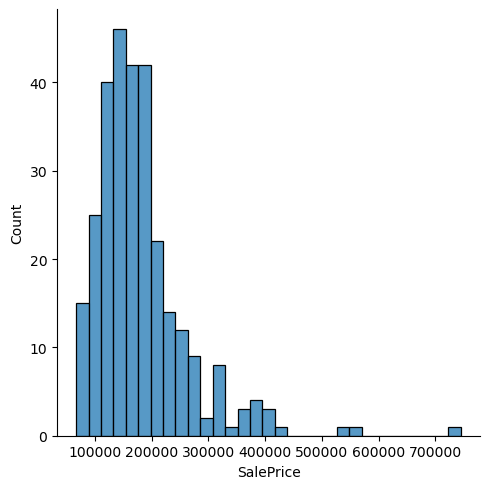

In [8]:
sns.displot(y_valid)

In [9]:
print("Skewness: %f" % y_valid.skew())
print("kurtosis: %f" % y_valid.kurt())

Skewness: 2.332547
kurtosis: 9.280464


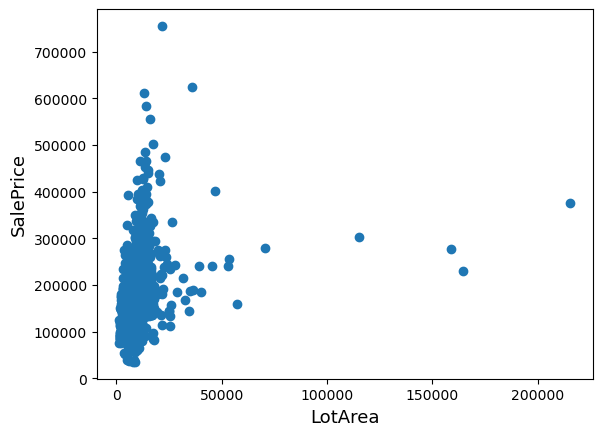

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = X_train_processed['LotArea'], y = y_train)
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('LotArea', fontsize = 13)
plt.show()

# Demonstrates little to no correlation between LotArea and SalePrice
# Makes me consider not using this for training

/tmp/ipykernel_32/2886834456.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, fit=norm)


Mu: 180808.89897260274 sigma: 78466.2996941807


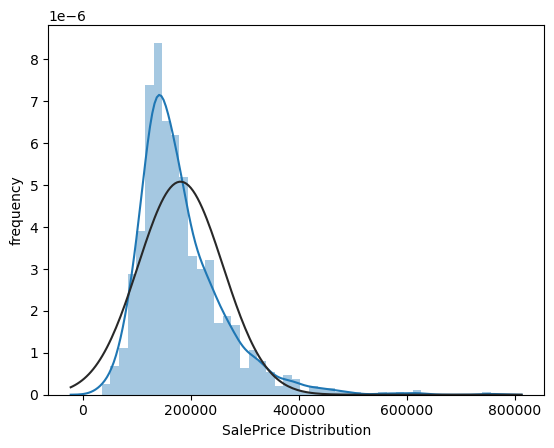

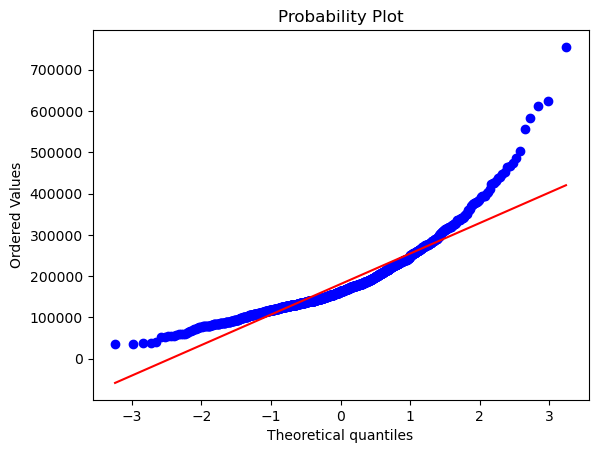

In [22]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(y_train, fit=norm)
(mu, sigma) = norm.fit(y_train)
print("Mu:", mu, "sigma:", sigma)
plt.ylabel('frequency')
plt.xlabel('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

/tmp/ipykernel_32/3658100201.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_norm, fit=norm)


Mu: 12.02336170160076 sigma: 0.40182223235731884


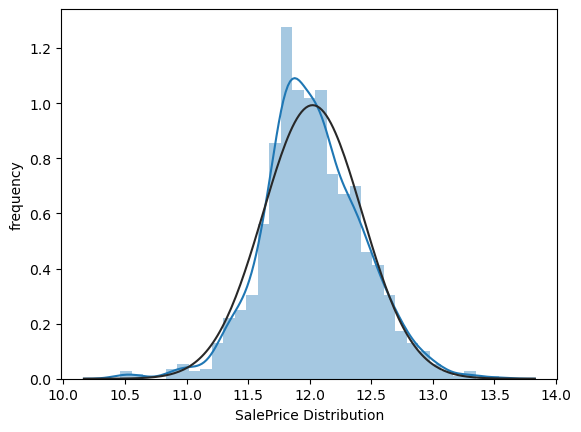

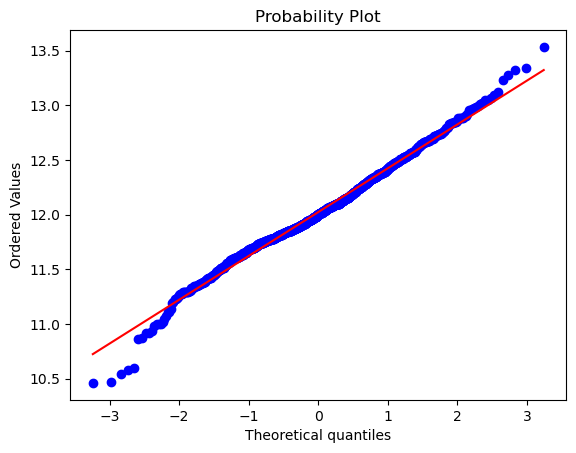

In [24]:
# Normalizing X_Train and X_Test
y_train_norm = np.log1p(y_train)
X_train_processed = np.log1p(X_train_processed)
y_valid_norm = np.log1p(y_valid)
X_valid_processed = np.log1p(X_valid_processed)
X_test_processed = np.log1p(X_test_processed)

sns.distplot(y_train_norm, fit=norm)
(mu, sigma) = norm.fit(y_train_norm)
print("Mu:", mu, "sigma:", sigma)
plt.ylabel('frequency')
plt.xlabel('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(y_train_norm, plot=plt)
plt.show()

<H1>Data Correlation</H1>

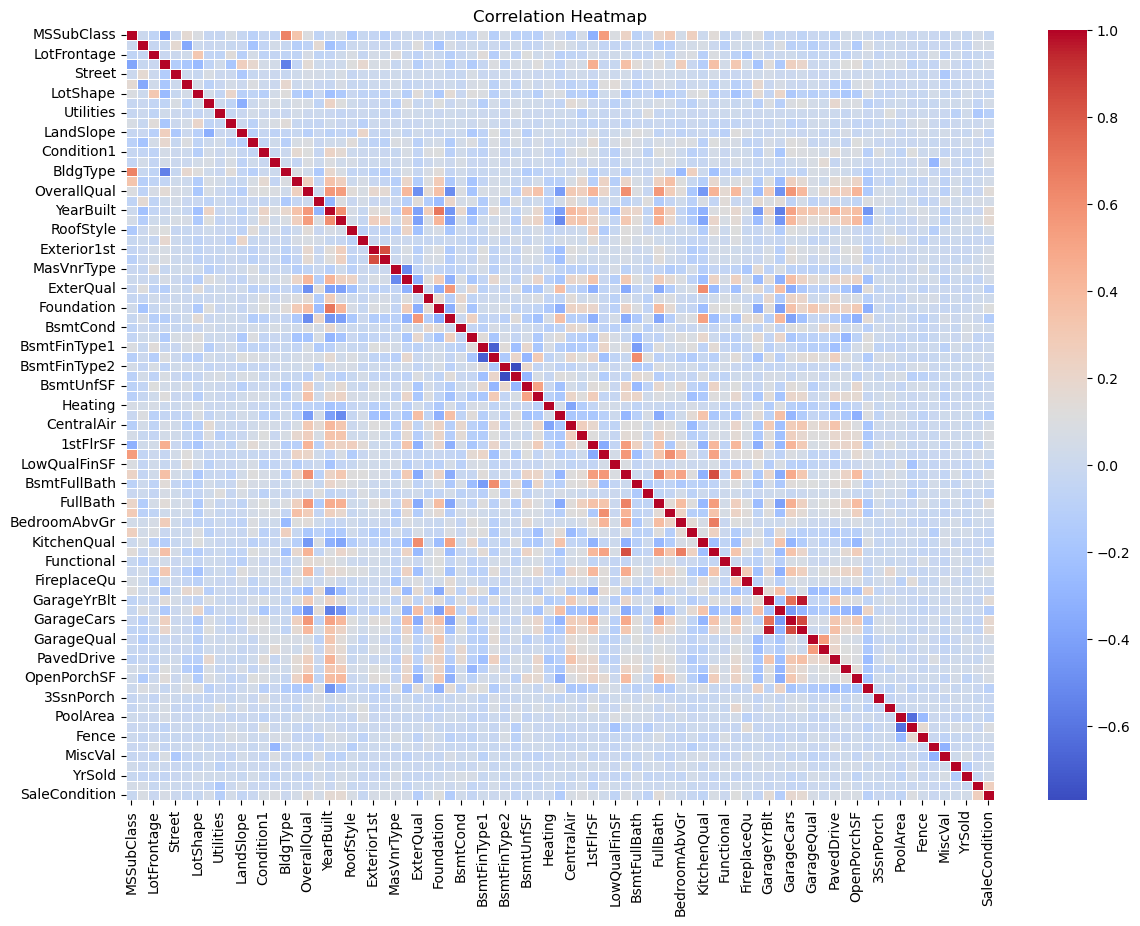

In [13]:
plt.figure(figsize=(14, 10))

cor = X_train_processed.corr()
cor = np.round(cor, decimals=2)  # Round the correlation values to two decimal places

sns.heatmap(cor, annot=False, cmap='coolwarm', linewidths=0.5)  # Use fmt=".2f" to format the annotations as 2 decimal places
plt.title('Correlation Heatmap')
plt.show()

# Diagonal line of 1 means that they are correlated

-----Pre-normalization-----
predictions: [190271. 171486. 104045. 219805.  71376.]
actual: [200624, 133000, 110000, 192000, 88000]
error: 27483.84367499121


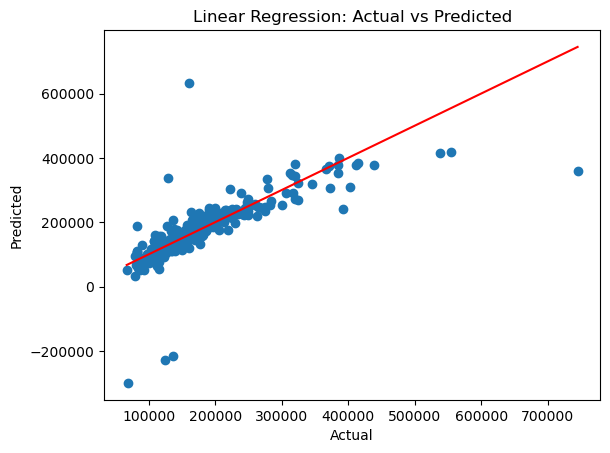

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

print("-----Pre-normalization-----")

model = LinearRegression()
model.fit(X_train_processed, y_train)
predictions = model.predict(X_valid_processed)
print('predictions:', predictions[0:5].round())
print('actual:', list(y_valid[0:5]))

error = mean_absolute_error(predictions, y_valid)
print("error:", error)

# Plotting the data
plt.scatter(y_valid, predictions)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [15]:
print("-----Post-normalization-----")


model_norm = LinearRegression()
model_norm.fit(X_train_processed, y_train)

preds = model_norm.predict(X_test_processed)
print('predictions:', preds[0:5].round())

-----Post-normalization-----
predictions: [116418. 170065. 188342. 200644. 180050.]


In [21]:
output = pd.DataFrame({'Id': X_test.index,
                      'SalePrice': preds})
output.to_csv('submission.csv', index=False)